# Preliminary

## Maximum Flow Problem

### Definition
Given:
- A directed graph $ G(V, E) $,
- A source node $s$,
- A sink node $t$,
- Intermediate nodes $ V \setminus \{s, t\} $,
- Each edge $ (u, v) \in E $ has a capacity $ c(u, v) \geq 0 $.

### Constraints

1. **Capacity Constraint**:
   The flow on any edge cannot exceed the capacity of that edge.
   $$0 \leq f(u, v) \leq c(u, v), \quad \forall (u, v) \in E$$
   

2. **Flow Conservation**:
   The total incoming flow at any intermediate node must equal the total outgoing flow.
   $$\sum_{w \in V} f(w, u) = \sum_{w \in V} f(u, w), \quad \forall u \in V \setminus \{s, t\}
   $$
   

3. **Residual Capacity for Forward Edges**:
   Forward flow can occur only if there is residual capacity along the edge.
   $$f(u, v) < c(u, v) \implies \text{flow can increase along } (u, v)$$

4. **Residual Capacity for Backward Edges**:
   Backward flow (reducing flow along an edge) is possible only if there is existing flow to cancel.
   $$f(u, v) > 0 \implies \text{flow can decrease along } (u, v)$$


### Objective
The goal is to maximize the total flow:
$$\text{Maximize } F = \sum_{(s, v) \in E} f(s, v)$$
which is the total flow out of the source $s$, or equivalently, into the sink $ t$:

$$F = \sum_{(v, t) \in E} f(v, t)$$


## Ford- Fulkerson Algorithm 

### Terminology 
1. **Residual Graph**: The graph which indicates adtional possible floe from source to sink. i.e posibility to add more flow
2. **Minimal cut** for any augumented path fro source to sink, minimal cut is the minimum remaining capacity of edges in that path
3. **Augumenting Path** A path from source to sink, it can consist of 
    1. Non full forward edge i.e $f(u, v) < c(u, v)$, here flow can be increased. we can think of this as flow moving in the direction of edge 
    2. Non empty backward edge i.e $f(u, v)  > 0$, here flow can be decreased. we can think of this as flow moving in the opposite direction of edge. 
### Example
See the example below

<img src="figures/flow example.jpg" alt="Flow Example" width="500">

Source is $A$ sink is $F$, 

Example of an augmented path consisting on foward edges only 
$A \implies C \implies D \implies E \implies F$
the residual (remaining) capacity of each edge is $ 11, 9, 8, 10 $

Here the minimal cut of he augumenting path is $8$

so lets increase the flow of the augumenting path by $8$ (in blue)

<img src="figures/flow example 1.jpg" alt="Flow Example 1" width="500">


Example of an augmented path consisting of foward edges and backward edges is  
$A \implies B \implies E \implies D \implies F$
the residual (remaining) capacity of each edge is $ 15, 9, 8, 11 $
here all edges are forward except $E \implies D$ which is backward and the residual capacity here is equal to current flow of edge . 

So the minimal cut is $8$  lets increase the flow once again 

<img src="figures/flow example 2.jpg" alt="Flow Example 2" width="500">

Note for forward edges flow is added and for backward edges flow is subtracted. and in both cases the flow is conserved



### Algorithm 
1. Start with intial flow as o for each of the edges
2. while there exits an Augumenting path from source to sink.
    1. Find augumenting path (use BFS or DFS)
    2. Find minimal cut (residual capacity) along the edges of the path
    3. Increase the flow along the path 

lets solve the an example from start to end to find the maximum flow

S. no|Augumenting Paths | Minimal Cut
--|---|---
1 | $S \to A \to D \to T$ | 8
2 | $S \to C \to D \to T$ | 2
3 | $S \to C \to D \to B \to T$ | 6
4 | $ S \to A \to B \to T$ | 2
5 | $ S \to C \to D \to A \to B  \to T$ | 1

the solution is here 

<img src="figures/flow solved.jpg" alt="Flow Example" width="800">



The maximum flow is $19$


# Definition

1. h-clique : Subgraph of G with h verticies that is fully connected 
2. h-clique density : no. of h- clique $/ |V|$
3. clique degree: no of h-clique instances containing vertex v 

# Problem Statement 

Given a graph $G(V,E)$ and h-clique $ \Psi (V_{\Psi}, E_{\Psi})$ return the subgraph $D$ whose h-clique density $p(D,\Psi)$ is highest 

# Example 

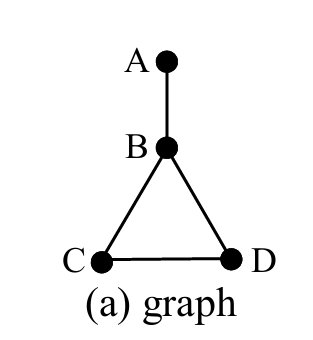


let h be 3 
then 3 -clique $\Psi$ will be $ \{B,C,D\}$

$d(A,\Psi) = 0$

$d(B,\Psi) = 1$

$d(C,\Psi) = 1$

$d(D,\Psi) = 1$

$p(G,\Psi) = 1/4$



# Exact Algorithm 

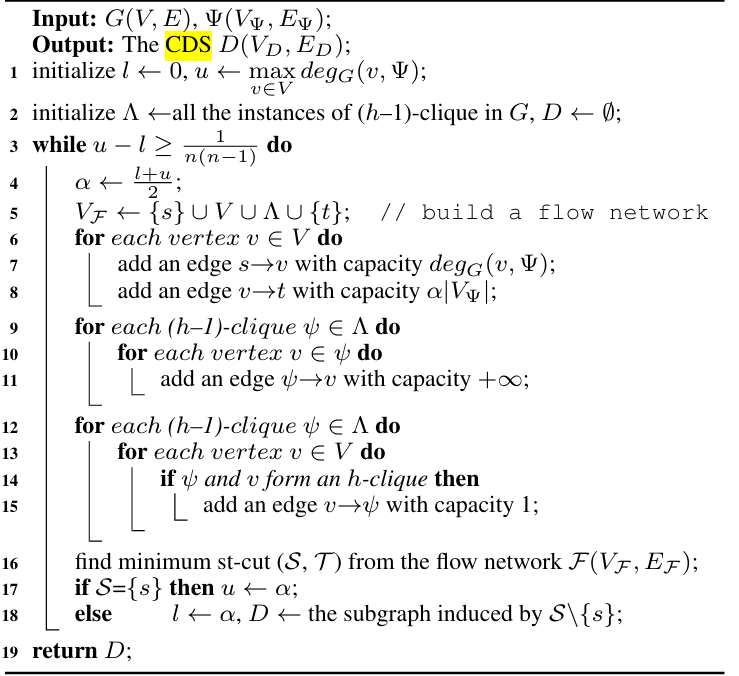

We use lower bound of density equal to zero and upper bound equal to max clique density. Then do the binary search to find the subgrah with highest clique density. Lets go through the example to see how to works 

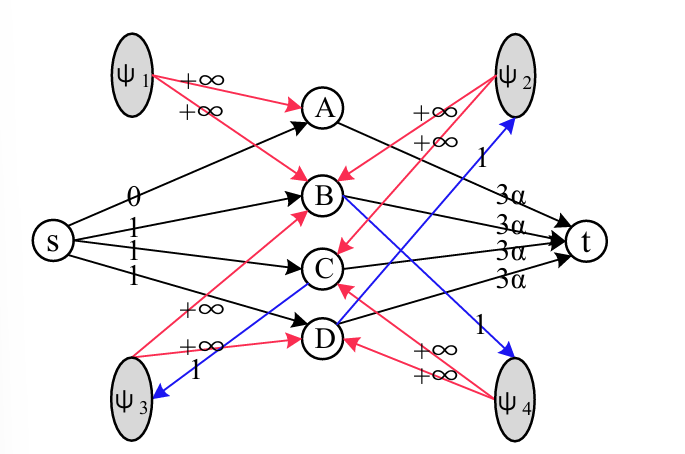

1. $l=0, u = 1$
2.  $h - 1$ cliques are 

    $\Psi_{1} = (A,B)$

    $\Psi_{2} = (B,C)$

    $\Psi_{3} = (B,D)$

    $\Psi_{4} = (C,D)$

3. iter 1 $ l - u = 1  is > 1/(4*3) $
    1. $\alpha = 1/2$
    2. Flow netwrok $V_f = \{s, A,B,C,D,\Psi_1, \Psi_2, \Psi_3, \Psi_4, t \}$
    3. add edges $\{ (s,A),(s,B),(s,C),(s,D),\}$ with capacity equal to $\{0,1,1,1\}$ also add edges $\{(A,t),(B,t),(C,t),(D,t),\}$ with capacity $ 1/2 \times 3 = 3/2$
    4. add edges from $h-1$ clique to their corresponding verticies i.e $\{ (\Psi_1,A),(\Psi_1,B), (\Psi_2,B),(\Psi_2,C),(\Psi_3,B),(\Psi_3,D),(\Psi_4,C),(\Psi_4,D)\}$ with capacity $\infty$
    5. for $h-1$ clique if adding a vertex will form a h clique add edge $\{ (D,\Psi_2),(C,\Psi_3),(B,\Psi_4)\}$ with capacity 1
    6.  maximum flow = 3

        $S = \{ s \}$ as no vertex is reachable from $s$. 

        $ T = \{ t, A,B,C,D, \Psi_1, \Psi_2 , \Psi_3 , \Psi_4 \} $
    
    7. $ u = \alpha = 3/2$ 

    iter 2 $ l - u = 1/2$  is $> 1/(4*3) $
    1. $\alpha = 1/4$
    2. Flow netwrok $V_f = \{s, A,B,C,D,\Psi_1, \Psi_2, \Psi_3, \Psi_4, t \}$
    3. add edges $\{ (s,A),(s,B),(s,C),(s,D),\}$ with capacity equal to $\{0,1,1,1\}$ also add edges $\{(A,t),(B,t),(C,t),(D,t),\}$ with capacity $ 1/4 \times 3 = 3/4$
    4. add edges from $h-1$ clique to their corresponding verticies i.e $\{ (\Psi_1,A),(\Psi_1,B), (\Psi_2,B),(\Psi_2,C),(\Psi_3,B),(\Psi_3,D),(\Psi_4,C),(\Psi_4,D)\}$ with capacity $\infty$
    5. for $h-1$ clique if adding a vertex will form a h clique add edge $\{ (D,\Psi_2),(C,\Psi_3),(B,\Psi_4)\}$ with capacity 1
    6.  maximum flow = 3

        $S = \{ s \}$ as no vertex is reachable from $s$. 

        $ T = \{ t, A,B,C,D, \Psi_1, \Psi_2 , \Psi_3 , \Psi_4 \} $
    
    7. $ u = \alpha = 3/2$ 
    8. create flow netwrok in same way
    9. maximum flow is $9/4$
    
        $S = \{ s, B,C,D \}$ as no vertex is reachable from $s$. 

        $ T = \{ t, A, \Psi_1, \Psi_2 , \Psi_3 , \Psi_4 \} $

    10. $D = \{ B,C,D \}$


        


![figures/after flow.png](<attachment:after flow.png>)
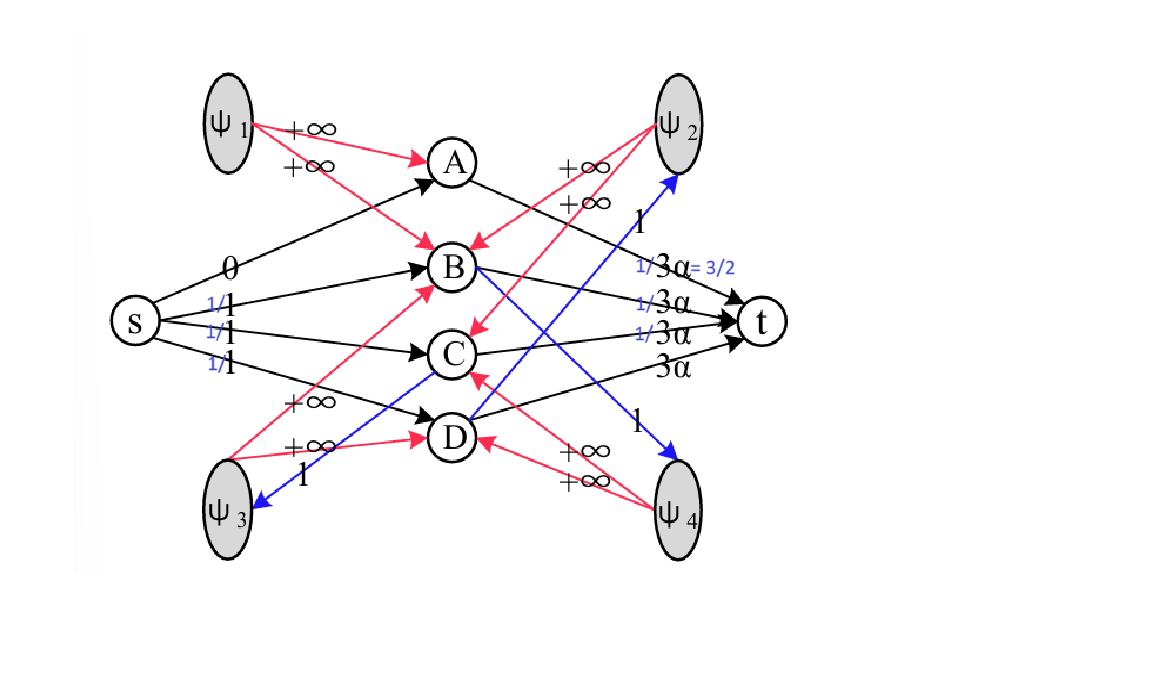

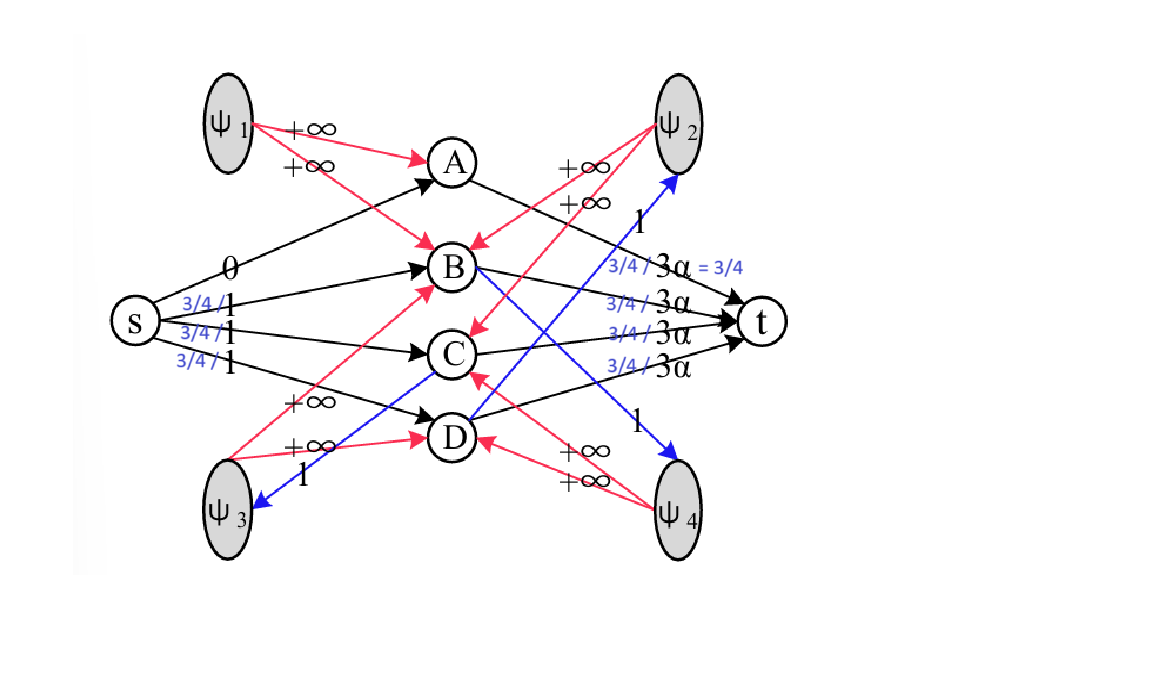

# $(k, \Psi )$ Core

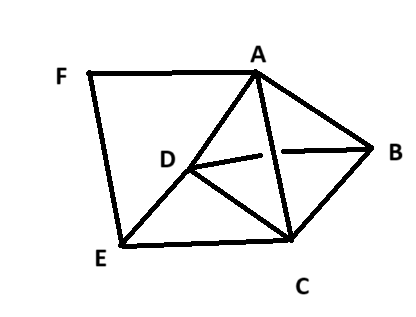

Let $\Psi $ is traingle that is 3 - Clique

$\{ (A,B,C), \ (A,D,C), \ (A,D,B), \ (D,B,C), \ (E,D,C)\}$

1. clique -degrees 
 
    $d (A, \Psi ) = 3 $

    $d (B, \Psi ) = 3 $

    $d (C, \Psi ) = 4 $

    $d (D, \Psi ) = 4 $

    $d (E, \Psi ) = 1 $

    $d (F, \Psi ) = 0 $

2. Sort

    | F | E | A | B | C | D |
    |---|---|---|---|---|---|
    | 0 | 1 | 3 | 3 | 4 | 4 |

iter 1: 

3. core $(F) = 0$, remove $F$
4. no $\Psi$ contains $F$
5. Resort 
    
    | E | A | B | C | D |
    |---|---|---|---|---|
    | 1 | 3 | 3 | 4 | 4 |
iter 2:

6. core $ (E) = 1$, remove $E$
7. $\Psi$ containing $E$ is $\{ (E,D,C) \}$
8. degree of $C$ and $D$ is > degree of E

    $d (C, \Psi ) = 4-1 = 3$

    $d (D, \Psi ) = 4-1 = 3$
9. resort 

    | A | B | C | D |
    |---|---|---|---|
    | 3 | 3 | 3 | 3 |

iter 3:

10. Core $(A) = 3$, remove 3. 
11. $\Psi$ containing $A$ is $\{ (A,B,C), \ (A,D,C),\ (A,D,B), \}$
12. no verticies have degree > degree of $A$
13. resort 

    | B | C | D |
    |---|---|---|
    | 3 | 3 | 3 |

14. do same to get the core values of $B,C,D$

|Vertex | A | B | C | D | E | F |
|----|---|---|---|---|---|---|
|Core | 3 | 3 | 3 | 3 | 1 | 0 |
    




# Core Exact Proposed by Paper 

## Tighter Bounds 

1. instead of $l=0$ set 

    $$
     \hspace{-20cm} {l  =  \frac{k_{max}}{|V_{\Psi}|}}
    $$


2. instead of $u = max(d(v,\Psi)) $ set 

    $$
     \hspace{-20cm} {u  =  k_{max}}
    $$


## Flow Network

Instead of using the full graph to create the flow network let prun the graph and then create the flow network 

Use $(k, \Psi)$ - Core to create Flow network, $k = \lceil l \rceil$

1. Pruning Rule 1 

    Use $(k^{'}, \Psi)$ - Core to create Flow network, $k = \lceil p \rceil$,where p is the max clique density of all residual graphs.

2. Pruning Rule 2 

    It is possible that the $(k^{'}, \Psi)$ - Core has multiple connected components, compute h-clique density $p^{'}$ of each component. 

    if $\lceil max(p^{'}) \rceil > k^{'} $ use new core $k^{''} = \lceil max(p^{'}) \rceil$. That is used $(k^{''}, \Psi )$ to generate flow netwrok 

3. Stoping Condition 

    instead of $u-l = \frac{1}{n(n-1)}$ we use 
    $$
     \hspace{-20cm} {u-l  = \frac{1}{|V_c|(|V_c|-1)}}
    $$
    where $V_c$ is the component used to create flow network

## The above two helps reduce the time 

The flow network progressively shrinks during the binary search as the lower bound \( l \) increases. 

This allows the CDS to be located in cores with higher clique-core numbers. 

As the clique-core numbers rise, the cores shrink, resulting in smaller flow networks and significantly reducing the cost of computing the minimum st-cut.

**Note: The rest of the algorith remains the same as that of exact algorithm**